### 1. Review 
- what is random variable
- what is distribution

### 2. weighted average
- 2 stock portfolio, winner stock stock outperforms buffett. losing stock outperforms buffett. portfolio underperform buffett. why?
warren: KO 5%, std 10%, weight = 10%, WMT 20%, std 30%, weight = 90% in Wmt, 10 in KO. expected turn = 90% X 20% + 10% X 5% = 18.5% (20% + 5%)/2 = average 
port std < 10% x 10% + 30% x 90% only the correlation (-1, 1) between the 2 stocks is 1. 

Me: PEP 6%, COST 30% 90% in pep, 10 in cost. 10% x 30% + 90% x 6% = 8.4%

- dot product.

### 3. Correlation between random variables
- correlation (-1, 1)

### some insights
- good investment decisions include 2 parts: selection and allocation. allocation is more important. expected return of port is weighted average of each stock
- diversification never increase the std of the portfolio beyond the weight average and usually reduce the std of the portfolio comparing to the weighted average of std of each stock

### 4. portforlio management in theory and practice

### Portfolio management in theory
- if there is no uncertainty/risks do we still need portfolio management?
- allocation decision -> get higher weighted return, get lower port std
- what is beta? cov/var 


### Portfolio management in practice
1. What is stock market? What is bond market? What are asset classes? What is a market index?
2. Is market efficent? is chess game efficent?
3. What's the difference between investing and trading? Investing and trading are 2 different games.
4. How to make money by investing? By predicting market? or By understanding the rules of the game and having an edge. Value/Growth/Quant etc.
5. What are investing decisions? investment decision and allocation decision.
6. What is portfolio management? investment decision + allocation decision -> Higher expected return, lower risk.

### Activity 1: correlation

In [15]:
# Import libraries and dependencies
import pandas as pd
from pathlib import Path
%matplotlib inline

In [16]:
# Read the ice cream sales data, set the `Month` as the index
ice_cream_data = Path("./Resources/ice_cream.csv")
ice_cream = pd.read_csv(ice_cream_data, index_col="Month")
ice_cream.head()

,Ice Cream Sales
Month,
January,175
February,150
March,200
April,190
May,250


In [17]:
# Read the drowning incident data, set the `Month` as the index
drowning_data = Path("./Resources/drowning.csv")
drowning = pd.read_csv(drowning_data, index_col="Month")
drowning.head()

,Drowning Incidents
Month,
January,0
February,1
March,3
April,2
May,10


In [18]:
# Use the `concat` function to combine the two DataFrames by matching indexes (or in this case `Month`)
combined_df = pd.concat([ice_cream, drowning], axis="columns", join="inner")
combined_df

,Ice Cream Sales,Drowning Incidents
Month,,
January,175,0
February,150,1
March,200,3
April,190,2
May,250,10
June,400,12
July,560,15
August,545,12
September,450,5


<Axes: xlabel='Month'>

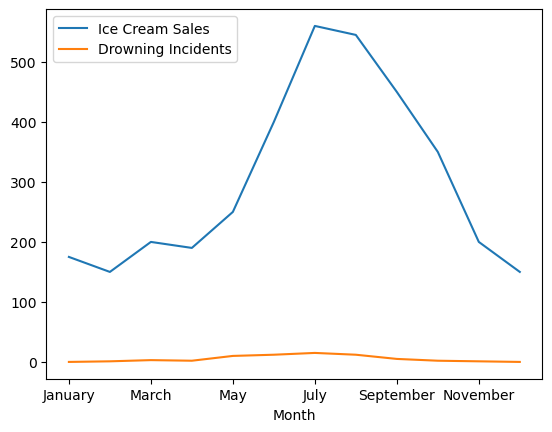

In [19]:
# Plot the data trends of the two variables over time
combined_df.plot()

<Axes: xlabel='Ice Cream Sales', ylabel='Drowning Incidents'>

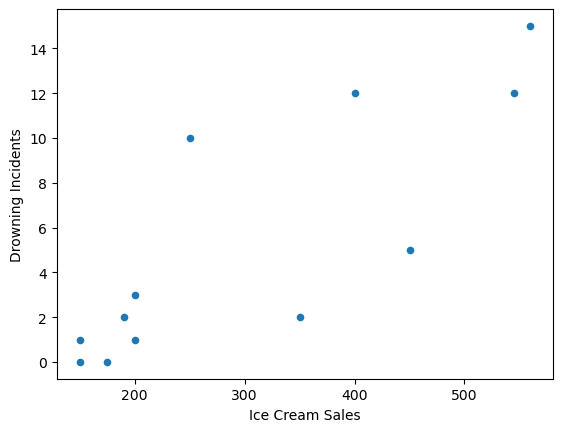

In [20]:
# Plot the relationship between the two variables
combined_df.plot(kind="scatter", x="Ice Cream Sales", y="Drowning Incidents")

In [21]:
# Calculate the correlation between each column
correlation = combined_df.corr()
correlation

,Ice Cream Sales,Drowning Incidents
Ice Cream Sales,1.000000,0.819404
Drowning Incidents,0.819404,1.000000


### some insights
- correlation is not causation


### Activity 2 Rolling Window Object

In [ ]:
# Read the TSLA data, set the `date` as the index
tsla_data = Path("./Resources/tsla_historical.csv")
tsla_df = pd.read_csv(tsla_data, index_col="date")
tsla_df.index = pd.to_datetime(tsla_df.index, format='%m/%d/%y') # explicit converting the 'date' column to a datatime object
# Sorting the date index in ascending order
tsla_df = tsla_df.sort_index()
# Display sample data
tsla_df.head(20)

close    2235
dtype: int64

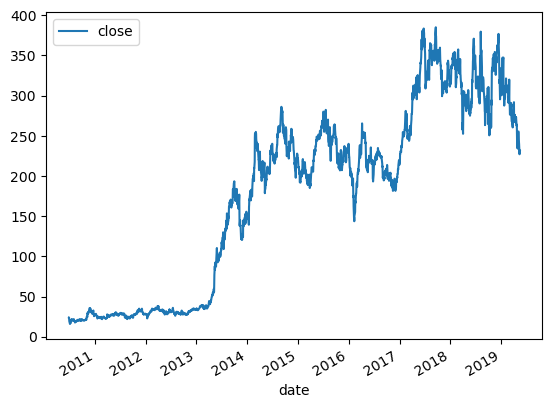

In [34]:
tsla_df.plot()
tsla_df.count()

<Axes: xlabel='date'>

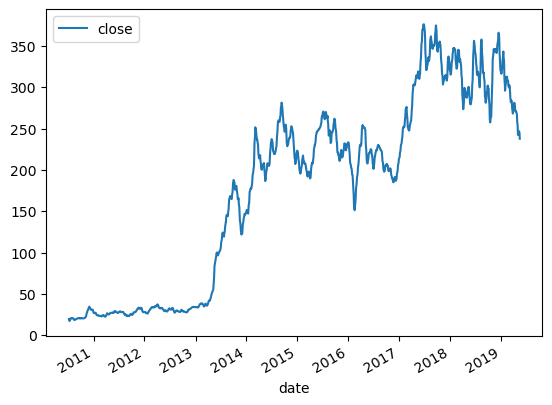

In [32]:
tsla_df.rolling(window=7).mean().plot()


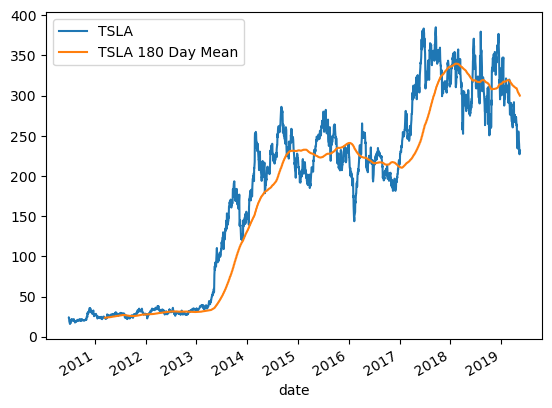

In [40]:
# Set figure of the daily closing prices of Tesla
ax = tsla_df.plot()

# Plot 180-Day Rolling Mean on the same figure
tsla_df.rolling(window=180).mean().plot(ax=ax)

# Set the legend of the figure
ax.legend(["TSLA", "TSLA 180 Day Mean"]);

### activity 5 beta

In [ ]:
# Read the daily closing prices of AMZN, set the `date` as a datetime index
amzn_data = Path("./Resources/amzn_data.csv")
amzn_df = pd.read_csv(amzn_data, index_col="date")

amzn_df.index = pd.to_datetime(amzn_df.index, format = '%m/%d/%y')
amzn_df.head()

In [ ]:
# Read the daily closing prices of S&P 500, set the `date` as a datetime index
sp500_data = Path("./Resources/sp500_data.csv")
sp500_df = pd.read_csv(sp500_data, index_col="date")
sp500_df.index = pd.to_datetime(sp500_df.index, format = '%m/%d/%y')
sp500_df.head()

### activity 7 portfolio construction

In [ ]:
# Read the EMB Historical Closing Prices
enb_data = Path("./Resources/emb_historical.csv")
enb = pd.read_csv(enb_data, index_col="Trade DATE")
enb.index = pd.to_datetime(enb.index, format = '%m/%d/%Y') # Cap Y is for 2019, lower case y is for 19
enb = enb.sort_index()
enb.head()

In [ ]:
# Read the IMO Historical Closing Prices
imo_data = Path("./Resources/imo_historical.csv")
imo = pd.read_csv(imo_data, index_col="Trade DATE")
imo.index = pd.to_datetime(imo.index, format = '%m/%d/%Y')
imo = imo.sort_index()
imo.head()